In [64]:
import pandas as pd
df = pd.read_csv("../csv/jago_reviews_raw.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,lang
0,a22d3997-f03f-4177-b517-2e9182cb02d8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,5,0,8.82.0,2026-02-27 15:41:08,NaN,NaN,8.82.0,id
1,4ce9e59e-640d-4fe8-b1a1-29680b6d9d88,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gimana saya masukin kode nya kl mau masukin ko...,1,0,8.82.0,2026-02-27 15:15:43,"Halo, Jagoan. Mohon maaf atas kendala yang ter...",2026-02-27 16:13:28,8.82.0,id
2,835f8aae-03f6-4e2f-931f-c7b416fa1e57,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"tiba"" kantong utama di blokir salah pin gapern...",1,0,8.82.0,2026-02-27 15:13:41,"Halo, Jagoan. Mohon maaf atas kendala yang ter...",2026-02-27 16:17:32,8.82.0,id
3,7c571ea2-3e78-465a-951a-6006d4402ca8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk gajelas saldo gopay gua hilang Mulu gara g...,1,0,NaN,2026-02-27 14:14:42,"Halo, Jagoan. Mohon maaf atas kendala yang ter...",2026-02-27 15:25:07,NaN,id
4,0c7277ed-381a-45e1-a1e6-49ab60f1440a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya pengen bank jago bisa memindahkan akun ja...,4,0,NaN,2026-02-27 13:21:33,"Halo, Jagoan! Terima kasih telah menggunakan B...",2026-02-27 14:53:29,NaN,id


In [65]:
df["at"] = pd.to_datetime(df["at"]) #ubah jadi datetime
df = df[["reviewId", "content", "score", "at", "lang"]]

df.info()
df.head()


<class 'pandas.DataFrame'>
RangeIndex: 75851 entries, 0 to 75850
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   reviewId  75851 non-null  str           
 1   content   75851 non-null  str           
 2   score     75851 non-null  int64         
 3   at        75851 non-null  datetime64[us]
 4   lang      75851 non-null  str           
dtypes: datetime64[us](1), int64(1), str(3)
memory usage: 2.9 MB


,reviewId,content,score,at,lang
0,a22d3997-f03f-4177-b517-2e9182cb02d8,mantap,5,2026-02-27 15:41:08,id
1,4ce9e59e-640d-4fe8-b1a1-29680b6d9d88,Gimana saya masukin kode nya kl mau masukin ko...,1,2026-02-27 15:15:43,id
2,835f8aae-03f6-4e2f-931f-c7b416fa1e57,"tiba"" kantong utama di blokir salah pin gapern...",1,2026-02-27 15:13:41,id
3,7c571ea2-3e78-465a-951a-6006d4402ca8,Apk gajelas saldo gopay gua hilang Mulu gara g...,1,2026-02-27 14:14:42,id
4,0c7277ed-381a-45e1-a1e6-49ab60f1440a,saya pengen bank jago bisa memindahkan akun ja...,4,2026-02-27 13:21:33,id


In [66]:
df_id = df[df["lang"] == "id"].copy() #ngambil yang langnya id
print(f"Jumlah review bahasa Indonesia: {len(df_id)}")
df_id["score"].value_counts().sort_index() # buat lihat persebaran untuk bintangnya




Jumlah review bahasa Indonesia: 67355


score
1    16379
2     2556
3     3055
4     3660
5    41705
Name: count, dtype: int64

In [67]:
def label_sentiment(score):
    if score <= 3:
        return "negatif"
    else:
        return "positif"

df_id["sentiment"] = df_id["score"].apply(label_sentiment)
df_id["sentiment"].value_counts()


sentiment
positif    45365
negatif    21990
Name: count, dtype: int64

In [68]:
import re
import string

def remove_emoji(text):
    emoji_pattern = re.compile("[" 
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

#Bikin salinan hanya kolom yang dipakai
df_text = df_id[["reviewId", "content", "score", "sentiment"]].copy()

# 1. Hapus emoji (paling awal, sebelum lowercase)
df_text["clean_text"] = df_text["content"].apply(remove_emoji)

#Ubah ke lowercase
df_text["clean_text"] = df_text["clean_text"].str.lower()

# 2. Hapus tanda baca (setelah lowercase, sebelum normalisasi slang)
df_text["clean_text"] = df_text["clean_text"].apply(remove_punctuation)

#Hapus URL
df_text["clean_text"] = df_text["clean_text"].apply(
    lambda x: re.sub(r"http\S+|www\S+", "", x)
)

#Hapus karakter non-huruf (angka, simbol, tanda baca berlebihan)
df_text["clean_text"] = df_text["clean_text"].apply(
    lambda x: re.sub(r"[^a-zA-Záéíóúüñçàèìòùâêîôûäëïöü\s]", " ", x)
)

#Hapus spasi berlebih
df_text["clean_text"] = df_text["clean_text"].apply(
    lambda x: re.sub(r"\s+", " ", x).strip()
)

df_text["clean_text"] = df_text["clean_text"].fillna("")

#Lihat hasil beberapa contoh
df_text[["content", "clean_text"]].head(10)

,content,clean_text
0,mantap,mantap
1,Gimana saya masukin kode nya kl mau masukin ko...,gimana saya masukin kode nya kl mau masukin ko...
2,"tiba"" kantong utama di blokir salah pin gapern...",tiba kantong utama di blokir salah pin gaperna...
3,Apk gajelas saldo gopay gua hilang Mulu gara g...,apk gajelas saldo gopay gua hilang mulu gara g...
4,saya pengen bank jago bisa memindahkan akun ja...,saya pengen bank jago bisa memindahkan akun ja...
5,Suka fitur rekening bersama dan bisa integrasi...,suka fitur rekening bersama dan bisa integrasi...
6,"Oke permasalahan sudah selesai, saya naikkan l...",oke permasalahan sudah selesai saya naikkan la...
7,"Bank Jago memang top, gratis biaya admin semua...",bank jago memang top gratis biaya admin semuan...
8,"Akun jago sy diblokir, sampai skrg ga bisa dib...",akun jago sy diblokir sampai skrg ga bisa dibu...
9,keren,keren


In [69]:
slang_dict = {
    "ga": "tidak", "gak": "tidak", "nggak": "tidak", "ngga": "tidak",
    "gk": "tidak", "tdk": "tidak", "g": "tidak",
    "sy": "saya", "aku": "saya", "gue": "saya", "gw": "saya",
    "lu": "kamu", "lo": "kamu", "elu": "kamu",
    "km": "kamu", "kamu": "kamu",
    "udh": "sudah", "udah": "sudah", "dah": "sudah",
    "blm": "belum", "blum": "belum",
    "bgt": "banget", "bngt": "banget",
    "yg": "yang", "yng": "yang",
    "dgn": "dengan", "dg": "dengan",
    "utk": "untuk", "tuk": "untuk",
    "jg": "juga", "jga": "juga",
    "sdh": "sudah", "sdng": "sedang",
    "krn": "karena", "karna": "karena",
    "bisa": "bisa", "bs": "bisa",
    "dr": "dari", "dri": "dari",
    "di": "di", "dlm": "dalam",
    "emg": "memang", "emang": "memang",
    "gimana": "bagaimana", "gmna": "bagaimana",
    "aja": "saja", "aj": "saja",
    "dpt": "dapat", "dpat": "dapat",
    "mau": "mau", "mo": "mau",
    "skrg": "sekarang", "skrang": "sekarang",
    "trs": "terus", "trus": "terus",
    "pengen": "ingin", "pgn": "ingin",
    "klo": "kalau", "kl": "kalau", "kalo": "kalau",
    "tp": "tapi", "tpi": "tapi",
    "apk": "aplikasi", "app": "aplikasi",
    "lg": "lagi", "lgi": "lagi",
    "nih": "ini", "ni": "ini",
    "itu": "itu", "tu": "itu",
    "hbs": "habis", "abis": "habis",
    "jgn": "jangan",
    "msh": "masih", "msih": "masih",
    "bnyk": "banyak", "bnyak": "banyak",
    "pke": "pakai", "pkai": "pakai", "make": "pakai",
    "sampe": "sampai", "smpe": "sampai",
    "knp": "kenapa", "knapa": "kenapa",
    "napa": "kenapa",
}

def normalize_slang(text):
    words = text.split()
    normalized = [slang_dict.get(word, word) for word in words]
    return " ".join(normalized)

df_text["clean_text"] = df_text["clean_text"].apply(normalize_slang)
df_text[["content", "clean_text"]].head(10)

,content,clean_text
0,mantap,mantap
1,Gimana saya masukin kode nya kl mau masukin ko...,bagaimana saya masukin kode nya kalau mau masu...
2,"tiba"" kantong utama di blokir salah pin gapern...",tiba kantong utama di blokir salah pin gaperna...
3,Apk gajelas saldo gopay gua hilang Mulu gara g...,aplikasi gajelas saldo gopay gua hilang mulu g...
4,saya pengen bank jago bisa memindahkan akun ja...,saya ingin bank jago bisa memindahkan akun jag...
5,Suka fitur rekening bersama dan bisa integrasi...,suka fitur rekening bersama dan bisa integrasi...
6,"Oke permasalahan sudah selesai, saya naikkan l...",oke permasalahan sudah selesai saya naikkan la...
7,"Bank Jago memang top, gratis biaya admin semua...",bank jago memang top gratis biaya admin semuan...
8,"Akun jago sy diblokir, sampai skrg ga bisa dib...",akun jago saya diblokir sampai sekarang tidak ...
9,keren,keren


In [70]:
import nltk

# Download resources 
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

# hapus stopword
stopwords_id_en = set([
    "dan", "yang", "di", "ke", "dari", "untuk", "ini", "itu", "saya", "aku",
    "the", "is", "am", "are", "to", "in", "on", "of", "for", "this", "that"
])

def preprocess_tokens(text):
    # 1. Tokenisasi
    tokens = word_tokenize(text)
    # 2. Buang stopwords
    tokens = [t for t in tokens if t.lower() not in stopwords_id_en]
    return tokens

# lakuin di kolom clean_text
df_text["tokens"] = df_text["clean_text"].apply(preprocess_tokens)

# Lihat contoh
df_text[["clean_text", "tokens"]].head(10)

[nltk_data] Downloading package punkt to /Users/macos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/macos/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,clean_text,tokens
0,mantap,[mantap]
1,bagaimana saya masukin kode nya kalau mau masu...,"[bagaimana, masukin, kode, nya, kalau, mau, ma..."
2,tiba kantong utama di blokir salah pin gaperna...,"[tiba, kantong, utama, blokir, salah, pin, gap..."
3,aplikasi gajelas saldo gopay gua hilang mulu g...,"[aplikasi, gajelas, saldo, gopay, gua, hilang,..."
4,saya ingin bank jago bisa memindahkan akun jag...,"[ingin, bank, jago, bisa, memindahkan, akun, j..."
5,suka fitur rekening bersama dan bisa integrasi...,"[suka, fitur, rekening, bersama, bisa, integra..."
6,oke permasalahan sudah selesai saya naikkan la...,"[oke, permasalahan, sudah, selesai, naikkan, l..."
7,bank jago memang top gratis biaya admin semuan...,"[bank, jago, memang, top, gratis, biaya, admin..."
8,akun jago saya diblokir sampai sekarang tidak ...,"[akun, jago, diblokir, sampai, sekarang, tidak..."
9,keren,[keren]


In [71]:
!pip install PySastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

df_text["tokens"] = df_text["tokens"].apply(stem_tokens)

# Update clean_text juga dari tokens hasil stemming
df_text["clean_text"] = df_text["tokens"].apply(lambda x: " ".join(x))


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


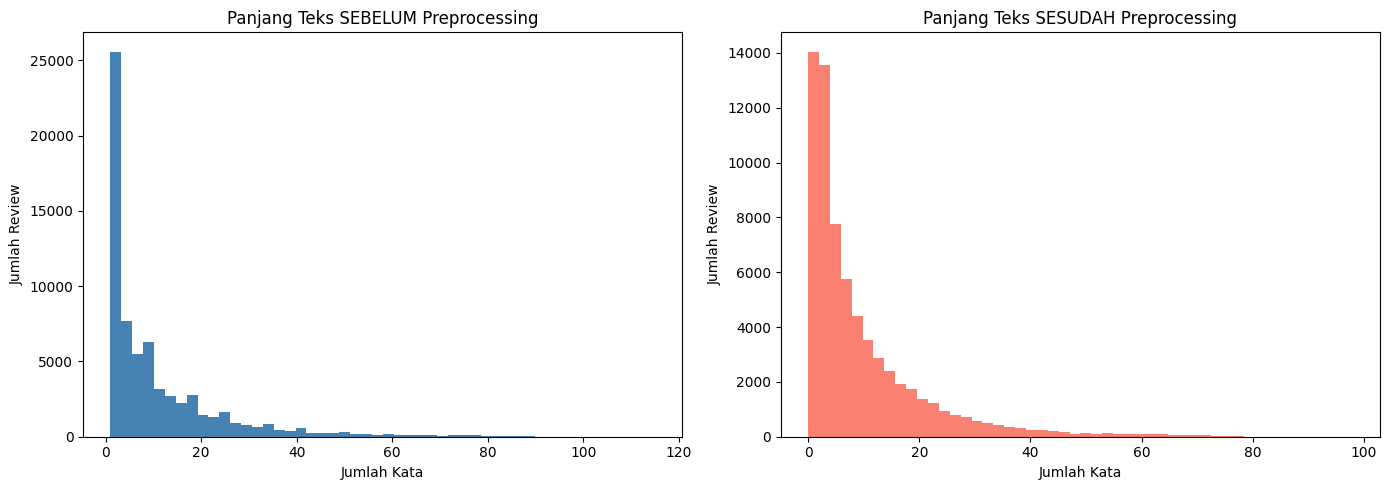

In [72]:
import matplotlib.pyplot as plt

df_text["original_length"] = df_text["content"].fillna("").str.split().apply(len)
df_text["clean_length"] = df_text["clean_text"].fillna("").str.split().apply(len)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df_text["original_length"], bins=50, color="steelblue")
axes[0].set_title("Panjang Teks SEBELUM Preprocessing")
axes[0].set_xlabel("Jumlah Kata")
axes[0].set_ylabel("Jumlah Review")

axes[1].hist(df_text["clean_length"], bins=50, color="salmon")
axes[1].set_title("Panjang Teks SESUDAH Preprocessing")
axes[1].set_xlabel("Jumlah Kata")
axes[1].set_ylabel("Jumlah Review")

plt.tight_layout()
plt.show()


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


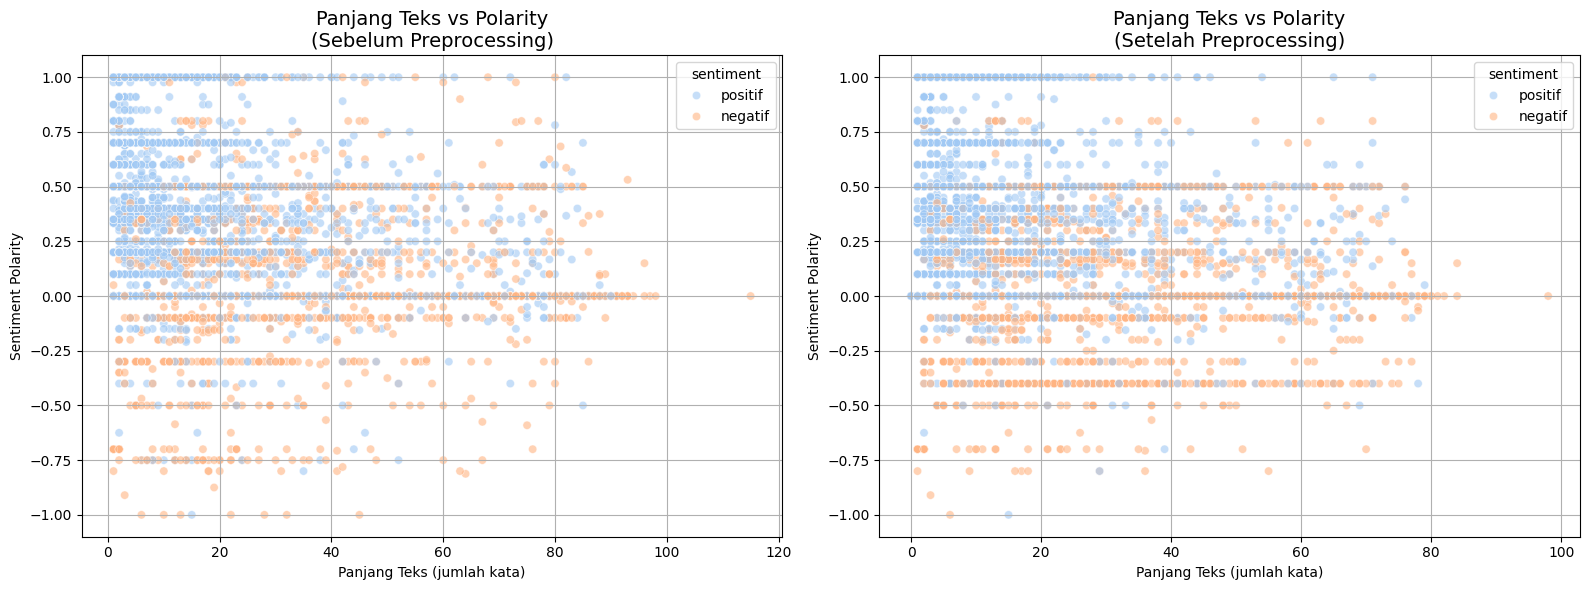

In [73]:
!pip install textblob

from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung polarity dari teks asli dan teks bersih
df_text['polarity_before'] = df_text['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df_text['polarity_after']  = df_text['clean_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot SEBELUM preprocessing
sns.scatterplot(
    data=df_text, ax=axes[0],
    x='original_length',
    y='polarity_before',
    hue='sentiment',
    palette='pastel',
    edgecolor='white',
    alpha=0.6
)
axes[0].set_title('Panjang Teks vs Polarity\n(Sebelum Preprocessing)', fontsize=14)
axes[0].set_xlabel('Panjang Teks (jumlah kata)')
axes[0].set_ylabel('Sentiment Polarity')
axes[0].grid(True)

# Plot SESUDAH preprocessing
sns.scatterplot(
    data=df_text, ax=axes[1],
    x='clean_length',
    y='polarity_after',
    hue='sentiment',
    palette='pastel',
    edgecolor='white',
    alpha=0.6
)
axes[1].set_title('Panjang Teks vs Polarity\n(Setelah Preprocessing)', fontsize=14)
axes[1].set_xlabel('Panjang Teks (jumlah kata)')
axes[1].set_ylabel('Sentiment Polarity')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [74]:
df_text.to_csv("../csv/jago_preprocessing_id.csv", index=False)


In [75]:
df_text["sentiment"].value_counts()
df_text.head()


,reviewId,content,score,sentiment,clean_text,tokens,original_length,clean_length,polarity_before,polarity_after
0,a22d3997-f03f-4177-b517-2e9182cb02d8,mantap,5,positif,mantap,[mantap],1,1,0.0,0.0
1,4ce9e59e-640d-4fe8-b1a1-29680b6d9d88,Gimana saya masukin kode nya kl mau masukin ko...,1,negatif,bagaimana masukin kode nya kalau mau masukin k...,"[bagaimana, masukin, kode, nya, kalau, mau, ma...",16,13,0.0,0.0
2,835f8aae-03f6-4e2f-931f-c7b416fa1e57,"tiba"" kantong utama di blokir salah pin gapern...",1,negatif,tiba kantong utama blokir salah pin gapernah a...,"[tiba, kantong, utama, blokir, salah, pin, gap...",15,13,0.0,0.0
3,7c571ea2-3e78-465a-951a-6006d4402ca8,Apk gajelas saldo gopay gua hilang Mulu gara g...,1,negatif,aplikasi gajelas saldo gopay gua hilang mulu g...,"[aplikasi, gajelas, saldo, gopay, gua, hilang,...",22,19,0.0,0.0
4,0c7277ed-381a-45e1-a1e6-49ab60f1440a,saya pengen bank jago bisa memindahkan akun ja...,4,positif,ingin bank jago bisa pindah akun jago syariah ...,"[ingin, bank, jago, bisa, pindah, akun, jago, ...",20,17,0.0,0.0


---
## Preprocessing - English Reviews

In [76]:
# Filter English reviews
df_en = df[df["lang"] == "en"].copy()
print(f"Total English reviews: {len(df_en)}")

# Label sentiment
df_en["sentiment"] = df_en["score"].apply(lambda x: "negative" if x <= 3 else "positive")
print(df_en["sentiment"].value_counts())

# Select columns
df_en_text = df_en[["reviewId", "content", "score", "sentiment"]].copy()

# Preprocessing
df_en_text["clean_text"] = df_en_text["content"].astype(str).str.lower()
df_en_text["clean_text"] = df_en_text["clean_text"].apply(lambda x: re.sub(r"http\S+|www\S+", "", x))
df_en_text["clean_text"] = df_en_text["clean_text"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_en_text["clean_text"] = df_en_text["clean_text"].apply(lambda x: re.sub(r"[^a-zA-Z\s]", " ", x))
df_en_text["clean_text"] = df_en_text["clean_text"].apply(lambda x: re.sub(r"\s+", " ", x).strip())
df_en_text["clean_text"] = df_en_text["clean_text"].fillna("")

print(f"\nPreprocessed English reviews: {len(df_en_text)}")
df_en_text.head()

Total English reviews: 8496
sentiment
positive    5272
negative    3224
Name: count, dtype: int64

Preprocessed English reviews: 8496


,reviewId,content,score,sentiment,clean_text
67355,714331b4-43f2-449a-a61f-cf2a76bd6d75,great banks with lot of benefit. but the app c...,3,negative,great banks with lot of benefit but the app ca...
67356,81f209ab-f250-469a-bd6d-3902ce778d4c,"Enjoy this apps so much, love it!",5,positive,enjoy this apps so much love it
67357,637cc414-884d-4981-be4e-52a4eb61b6bc,"halo admin bank jago, aplikasinya bagus banget...",5,positive,halo admin bank jago aplikasinya bagus banget ...
67358,f6244850-a883-47a8-8670-1c07b62118ad,nice app,5,positive,nice app
67359,010ae6b9-964e-4367-a2a4-ae4ef48ba7f5,top dah 0 admin,5,positive,top dah admin


In [77]:
# Save to CSV
df_en_text.to_csv("../csv/jago_preprocessing_en.csv", index=False)
print(" Saved to ../csv/jago_preprocessing_en.csv")

 Saved to ../csv/jago_preprocessing_en.csv
